In [1]:
# Utility function to perform one hot encoding
def encode_and_bind(originaldataframe, featuretoencode):
    originaldataframe[featuretoencode] = originaldataframe[featuretoencode].fillna('Missing')
    dummies = pd.get_dummies(originaldataframe[[featuretoencode]])
    res = pd.concat([originaldataframe, dummies], axis=1)
    #    print(res.columns)
    return(res)

# Main cleaning function
def transform_df(df):
    # Converting to Date datatype and splitting columns
    df['CurrentDate'] = pd.to_datetime(df['CurrentDate'], format = '%m/%d/%Y', errors = 'coerce')
    df['AccountDetail2'] = pd.to_datetime(df['AccountDetail2'], format = '%m/%d/%Y', errors = 'coerce')
    df['AccountStatus2'] = pd.to_datetime(df['AccountStatus2'], format = '%m/%d/%Y', errors = 'coerce')
    df['PrevAccountDetail1'] = pd.to_datetime(df['PrevAccountDetail1'], format = '%m/%d/%Y', errors = 'coerce')  
    df['AccountDetail8'] = pd.to_datetime(df['AccountDetail8'], format = '%m/%d/%Y', errors = 'coerce')
    df['Payment2'] = pd.to_datetime(df['Payment2'], format = '%m/%d/%Y', errors = 'coerce')
    df['Payment4'] = pd.to_datetime(df['Payment4'], format = '%m/%d/%Y', errors = 'coerce')
    
    df['Payment2'].fillna(df['Payment4'])
    df['AccountStatus2'].fillna(df['AccountDetail8'])
    df['PrevAccountDetail1'].fillna(df['AccountDetail2'])
    
    df['CurrentDateyear'] = df['CurrentDate'].dt.year
    df['CurrentDatemonth'] = df['CurrentDate'].dt.month
    df['AccountDetail2year'] = df['AccountDetail2'].dt.year
    df['AccountDetail2month'] = df['AccountDetail2'].dt.month
    df['AccountStatus2year'] = df['AccountStatus2'].dt.year
    df['AccountStatus2month'] = df['AccountStatus2'].dt.month
    df['PrevAccountDetail1year'] = df['PrevAccountDetail1'].dt.year
    df['PrevAccountDetail1month'] = df['PrevAccountDetail1'].dt.month
    df['AccountDetail8year'] = df['AccountDetail8'].dt.year
    df['AccountDetail8month'] = df['AccountDetail8'].dt.month
    df['Payment2year'] = df['Payment2'].dt.year
    df['Payment2month'] = df['Payment2'].dt.month
    df['Payment4year'] = df['Payment2'].dt.year
    df['Payment4month'] = df['Payment2'].dt.month
    
    
    from sklearn.impute import SimpleImputer
    mf_imputer = SimpleImputer(strategy='most_frequent')
    
    
    df[['AccountStatus2year','AccountStatus2month',
        'PrevAccountDetail1year','PrevAccountDetail1month',
        'AccountDetail8year','AccountDetail8month',
        'Payment2year','Payment2month',
        'Payment4year','Payment4month']] = mf_imputer.fit_transform(df[['AccountStatus2year','AccountStatus2month',
                                                                        'PrevAccountDetail1year',
                                                                        'PrevAccountDetail1month',
                                                                        'AccountDetail8year',
                                                                        'AccountDetail8month','Payment2year',
                                                                        'Payment2month',
                                                                        'Payment4year','Payment4month']])
    
    # One Hot Encoding Columns
    df = encode_and_bind(df, 'AccountStatus1')
    df = encode_and_bind(df, 'PrevAccountStatus1')
    df = encode_and_bind(df, 'PrevAccountStatus2')
    
    # Label Encoding Columns
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    df['AccountDetail5'].fillna('NaN',inplace=True)
    df['AccountDetail6'].fillna('NaN',inplace=True)
    df['AccountDetail5cat'] = labelencoder.fit_transform(df['AccountDetail5'])
    df['AccountDetail6cat'] = labelencoder.fit_transform(df['AccountDetail6'])
    
    # Dropping Unnecessary columns
    df.drop(['CurrentDate','AccountDetail2',
             'AccountStatus2', 'PrevAccountDetail1',
             'AccountDetail8','Payment2','Payment4',
             'PrevAccountStatus1','AccountStatus1',
             'PrevAccountStatus2','AccountDetail5',
             'AccountDetail6','AccountStatus1_Missing',
             'PrevAccountStatus1_Missing','PrevAccountStatus2_Missing',
             'UniqueID'],axis=1,inplace=True)
    
    df[['AccountActivity4','AccountActivity7',
        'HistoricalAccountActivity4','HistoricalAccountActivity7',
        'HistoricalAccountDetail2','HistoricalAccountDetail3',
        'HistoricalAccountDetail4','HistoricalAccountStatus1',
        'HistoricalAccountStatus2','HistoricalAccountStatus3',
        'HistoricalAccountStatus4','HistoricalAccountStatus5','HistoricalAccountStatus6',
        'HistoricalAccountStatus7','HistoricalAccountStatus8','HistoricalAccountStatus9',
        'HistoricalAccountStatus10','HistoricalAccountStatus11','HistoricalAccountStatus12',
        'HistoricalAccountStatus13','HistoricalAccountStatus14']] = df[['AccountActivity4','AccountActivity7',
                                                                        'HistoricalAccountActivity4','HistoricalAccountActivity7',
                                                                        'HistoricalAccountDetail2','HistoricalAccountDetail3',
                                                                        'HistoricalAccountDetail4','HistoricalAccountStatus1',
                                                                        'HistoricalAccountStatus2','HistoricalAccountStatus3',
                                                                        'HistoricalAccountStatus4','HistoricalAccountStatus5','HistoricalAccountStatus6',
                                                                        'HistoricalAccountStatus7','HistoricalAccountStatus8','HistoricalAccountStatus9',
                                                                        'HistoricalAccountStatus10','HistoricalAccountStatus11','HistoricalAccountStatus12',
                                                                        'HistoricalAccountStatus13','HistoricalAccountStatus14']].interpolate()
    
    df[['AccountActivity3','AccountActivity4',
        'AccountActivity5','AccountActivity6',
        'AccountActivity7','Balance1','Balance2','Payment1','PrevBalance1']] = df[['AccountActivity3','AccountActivity4','AccountActivity5',
                                                                                   'AccountActivity6','AccountActivity7','Balance1','Balance2',
                                                                                   'Payment1','PrevBalance1']].interpolate()
    
    
    df[['HistoricalAccountActivity1','HistoricalAccountActivity2',
        'HistoricalAccountActivity3','HistoricalAccountActivity4',
        'HistoricalAccountActivity5','HistoricalAccountActivity6',
        'HistoricalAccountActivity7','HistoricalAccountActivity8']] = df[['HistoricalAccountActivity1','HistoricalAccountActivity2',
                                                                          'HistoricalAccountActivity3','HistoricalAccountActivity4',
                                                                          'HistoricalAccountActivity5','HistoricalAccountActivity6',
                                                                          'HistoricalAccountActivity7','HistoricalAccountActivity8']].interpolate()
    
    df[['HistoricalAccountDetail1','HistoricalAccountDetail2',
        'HistoricalAccountDetail3','HistoricalAccountDetail4']] =  df[['HistoricalAccountDetail1','HistoricalAccountDetail2',
                                                                       'HistoricalAccountDetail3','HistoricalAccountDetail4']].interpolate()
    
    df[['HistoricalAccountStatus1','HistoricalAccountStatus2','HistoricalAccountStatus3',
       'HistoricalAccountStatus4','HistoricalAccountStatus5','HistoricalAccountStatus6',
       'HistoricalAccountStatus7','HistoricalAccountStatus8','HistoricalAccountStatus9',
       'HistoricalAccountStatus10','HistoricalAccountStatus11','HistoricalAccountStatus12',
       'HistoricalAccountStatus13','HistoricalAccountStatus14']] =     df[['HistoricalAccountStatus1','HistoricalAccountStatus2','HistoricalAccountStatus3',
                                                                           'HistoricalAccountStatus4','HistoricalAccountStatus5','HistoricalAccountStatus6',
                                                                           'HistoricalAccountStatus7','HistoricalAccountStatus8','HistoricalAccountStatus9',
                                                                           'HistoricalAccountStatus10','HistoricalAccountStatus11','HistoricalAccountStatus12',
                                                                           'HistoricalAccountStatus13','HistoricalAccountStatus14']].interpolate()
    
    df[['HistoricalBalance1','Payment3']] = df[['HistoricalBalance1','Payment3']].interpolate()
    
    cols_with_nans = df.columns[df.isna().any()].tolist()
    if cols_with_nans != []:
        df[cols_with_nans] = mf_imputer.fit_transform(df[cols_with_nans])
    
    return df

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

# read in our data
df = pd.read_csv('C:/Users/HP/Analytics competition/Competition/DSU Competition Development Data.csv')
final_df = pd.read_csv('C:/Users/HP/Analytics competition/Competition/DSU Competition Out-Of-Time Data.csv')

# set seed for reproducibility
np.random.seed(0)

In [3]:
df.columns

Index(['UniqueID', 'CurrentDate', 'AccountActivity1', 'AccountActivity2',
       'AccountDetail1', 'AccountDetail2', 'AccountDetail3', 'AccountDetail4',
       'AccountDetail5', 'AccountDetail6', 'AccountDetail7', 'AccountStatus1',
       'AccountStatus2', 'PrevAccountDetail1', 'PrevAccountStatus1',
       'PrevAccountStatus2', 'AccountActivity3', 'AccountActivity4',
       'AccountActivity5', 'AccountActivity6', 'AccountActivity7', 'Balance1',
       'Balance2', 'Payment1', 'PrevBalance1', 'AccountDetail8',
       'HistoricalAccountActivity1', 'HistoricalAccountActivity2',
       'HistoricalAccountActivity3', 'HistoricalAccountActivity4',
       'HistoricalAccountActivity5', 'HistoricalAccountActivity6',
       'HistoricalAccountActivity7', 'HistoricalAccountActivity8',
       'HistoricalAccountDetail1', 'HistoricalAccountDetail2',
       'HistoricalAccountDetail3', 'HistoricalAccountDetail4',
       'HistoricalAccountStatus1', 'HistoricalAccountStatus2',
       'HistoricalAccountStat

In [4]:
final_df.columns

Index(['UniqueID', 'CurrentDate', 'AccountActivity1', 'AccountActivity2',
       'AccountDetail1', 'AccountDetail2', 'AccountDetail3', 'AccountDetail4',
       'AccountDetail5', 'AccountDetail6', 'AccountDetail7', 'AccountStatus1',
       'AccountStatus2', 'PrevAccountDetail1', 'PrevAccountStatus1',
       'PrevAccountStatus2', 'AccountActivity3', 'AccountActivity4',
       'AccountActivity5', 'AccountActivity6', 'AccountActivity7', 'Balance1',
       'Balance2', 'Payment1', 'PrevBalance1', 'AccountDetail8',
       'HistoricalAccountActivity1', 'HistoricalAccountActivity2',
       'HistoricalAccountActivity3', 'HistoricalAccountActivity4',
       'HistoricalAccountActivity5', 'HistoricalAccountActivity6',
       'HistoricalAccountActivity7', 'HistoricalAccountActivity8',
       'HistoricalAccountDetail1', 'HistoricalAccountDetail2',
       'HistoricalAccountDetail3', 'HistoricalAccountDetail4',
       'HistoricalAccountStatus1', 'HistoricalAccountStatus2',
       'HistoricalAccountStat

In [5]:
new_df = transform_df(df)
new_final_df = transform_df(final_df)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stat

In [6]:
from sklearn.impute import SimpleImputer
mf_imputer = SimpleImputer(strategy='most_frequent')
cols_with_nans = new_df.columns[new_df.isna().any()].tolist()
new_df[cols_with_nans] = mf_imputer.fit_transform(new_df[cols_with_nans])

ValueError: at least one array or dtype is required

In [7]:
cols_with_nans = new_final_df.columns[new_final_df.isna().any()].tolist()
cols_with_nans

[]

In [8]:
new_df.drop(['Target'], axis=1).columns == new_final_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [9]:
new_df['HistoricalAccountStatus3'].isna().sum()

0

array([[<AxesSubplot:title={'center':'AccountActivity1'}>,
        <AxesSubplot:title={'center':'AccountActivity2'}>,
        <AxesSubplot:title={'center':'AccountDetail1'}>,
        <AxesSubplot:title={'center':'AccountDetail3'}>,
        <AxesSubplot:title={'center':'AccountDetail4'}>,
        <AxesSubplot:title={'center':'AccountDetail7'}>,
        <AxesSubplot:title={'center':'AccountActivity3'}>,
        <AxesSubplot:title={'center':'AccountActivity4'}>,
        <AxesSubplot:title={'center':'AccountActivity5'}>],
       [<AxesSubplot:title={'center':'AccountActivity6'}>,
        <AxesSubplot:title={'center':'AccountActivity7'}>,
        <AxesSubplot:title={'center':'Balance1'}>,
        <AxesSubplot:title={'center':'Balance2'}>,
        <AxesSubplot:title={'center':'Payment1'}>,
        <AxesSubplot:title={'center':'PrevBalance1'}>,
        <AxesSubplot:title={'center':'HistoricalAccountActivity1'}>,
        <AxesSubplot:title={'center':'HistoricalAccountActivity2'}>,
        <Axe

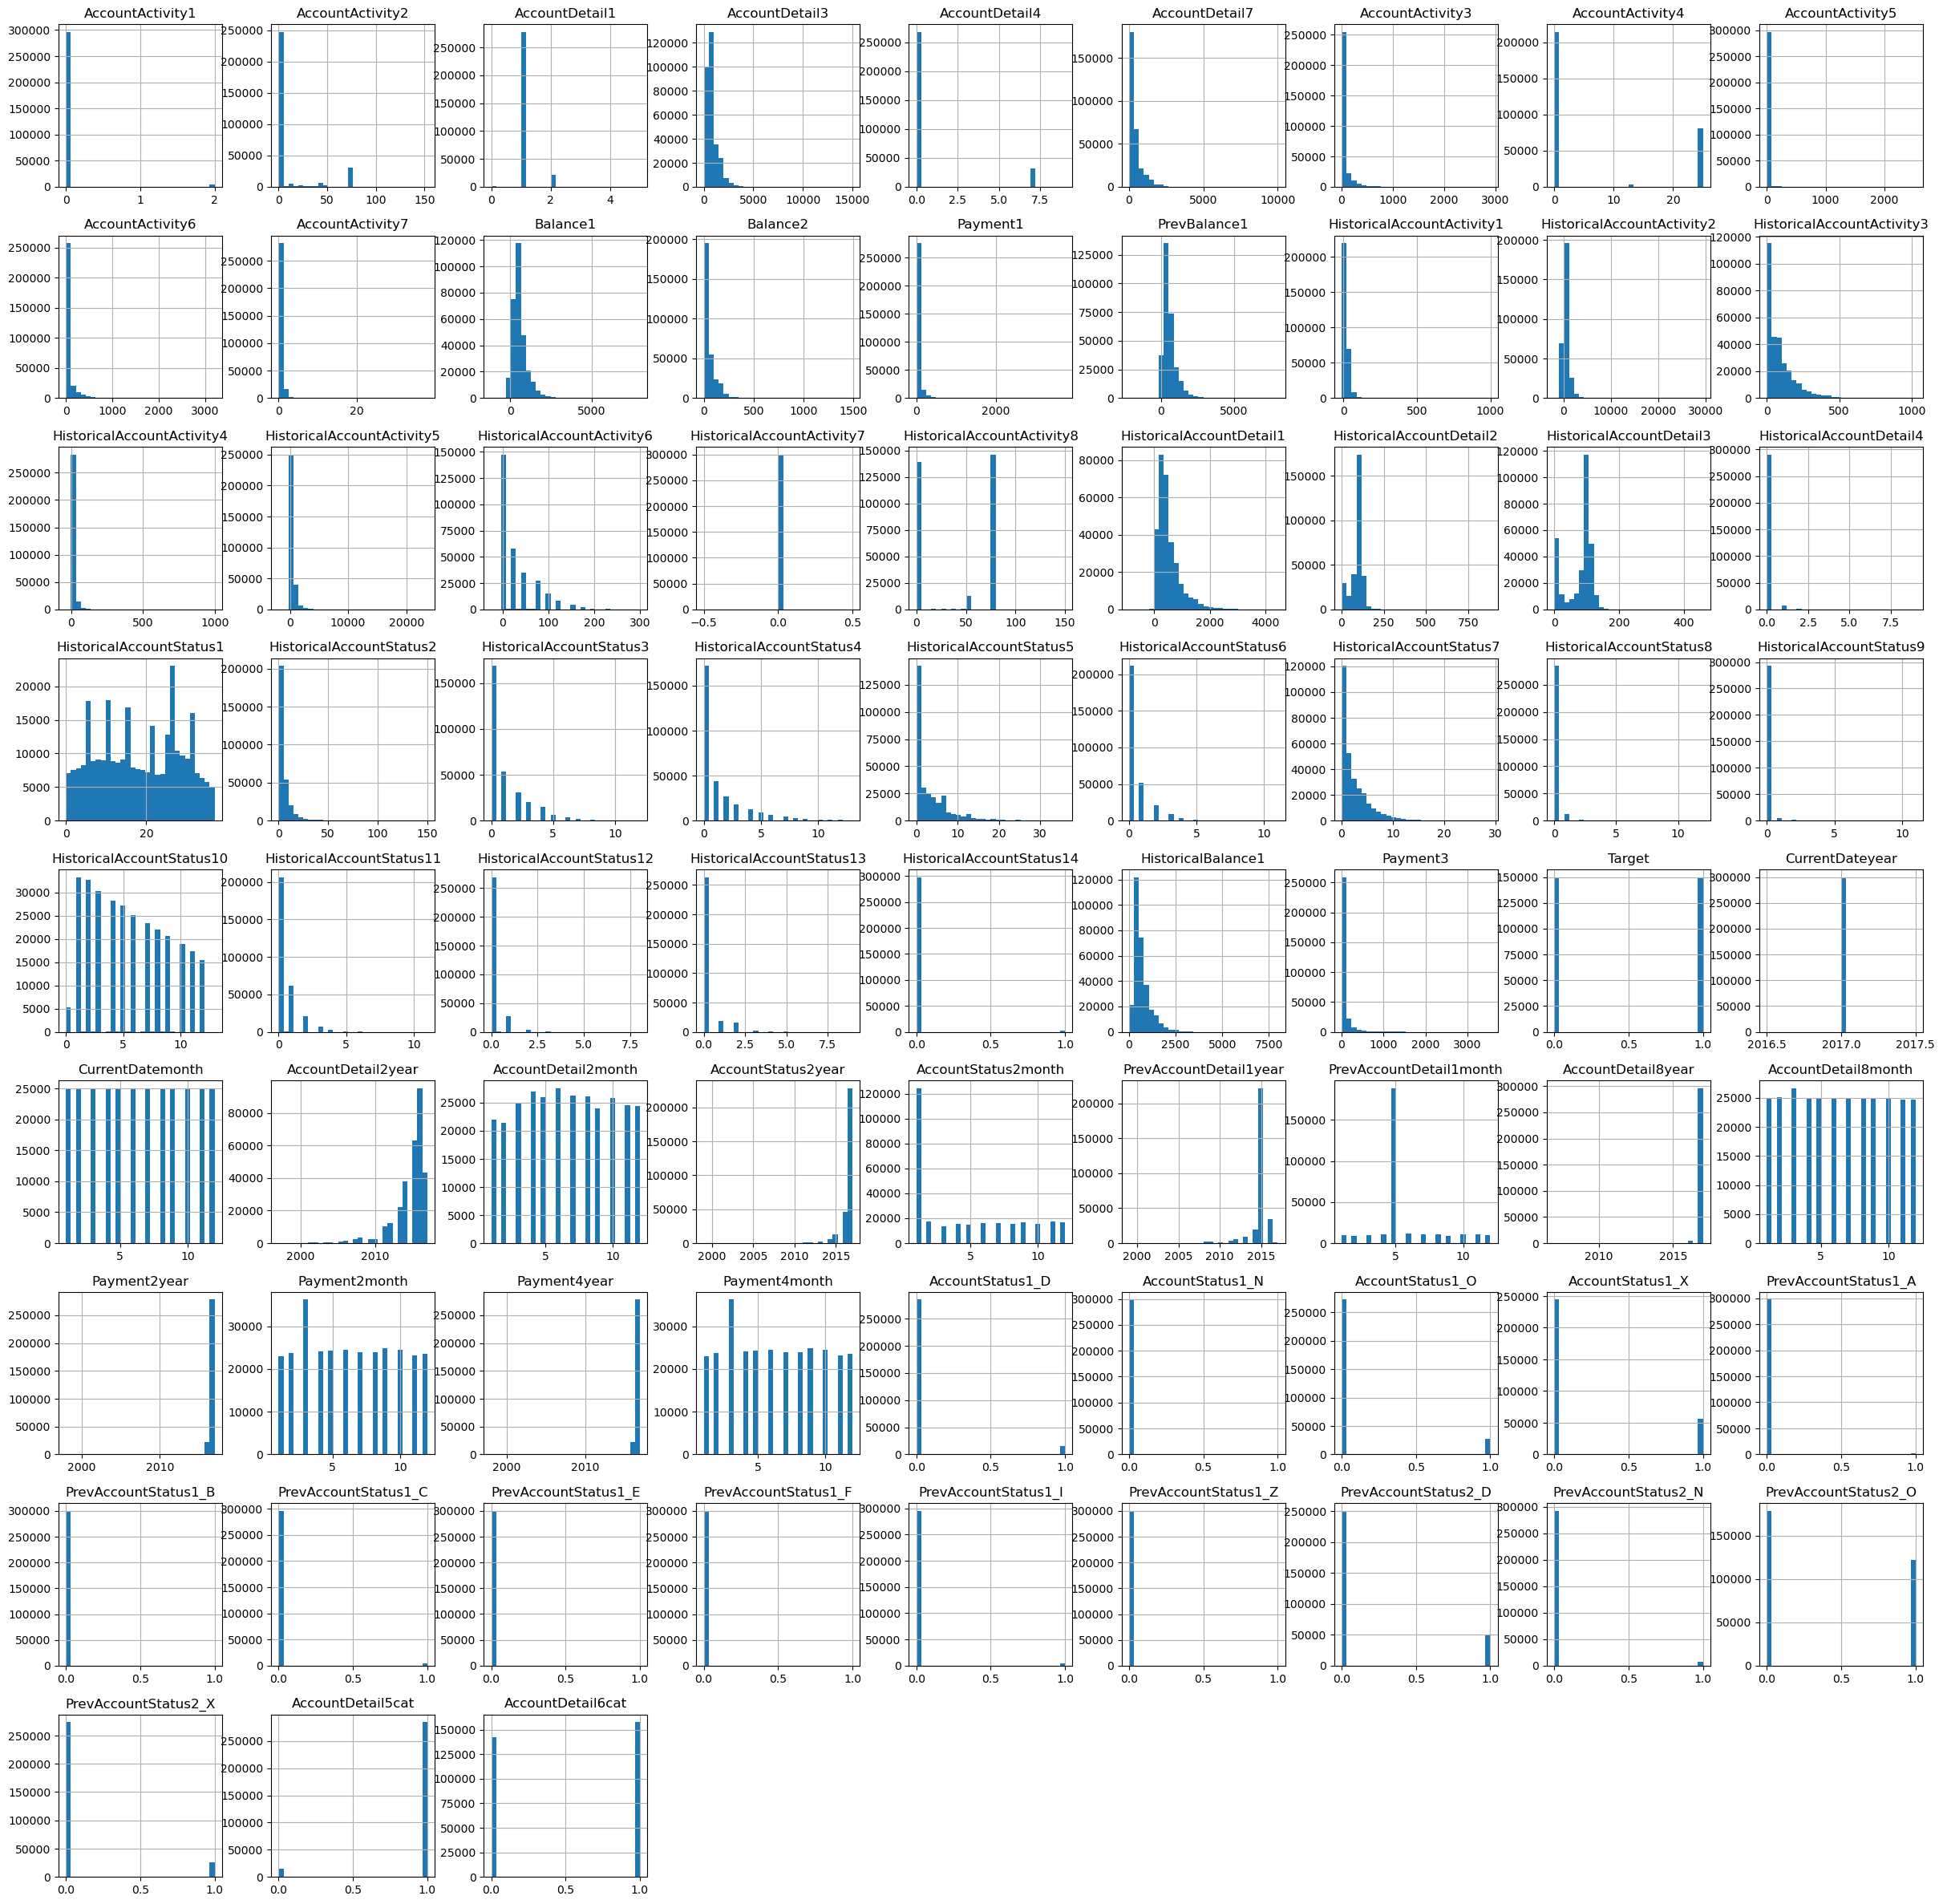

In [10]:
new_df.hist(bins = 30, figsize=(30,30))

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.8 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classif

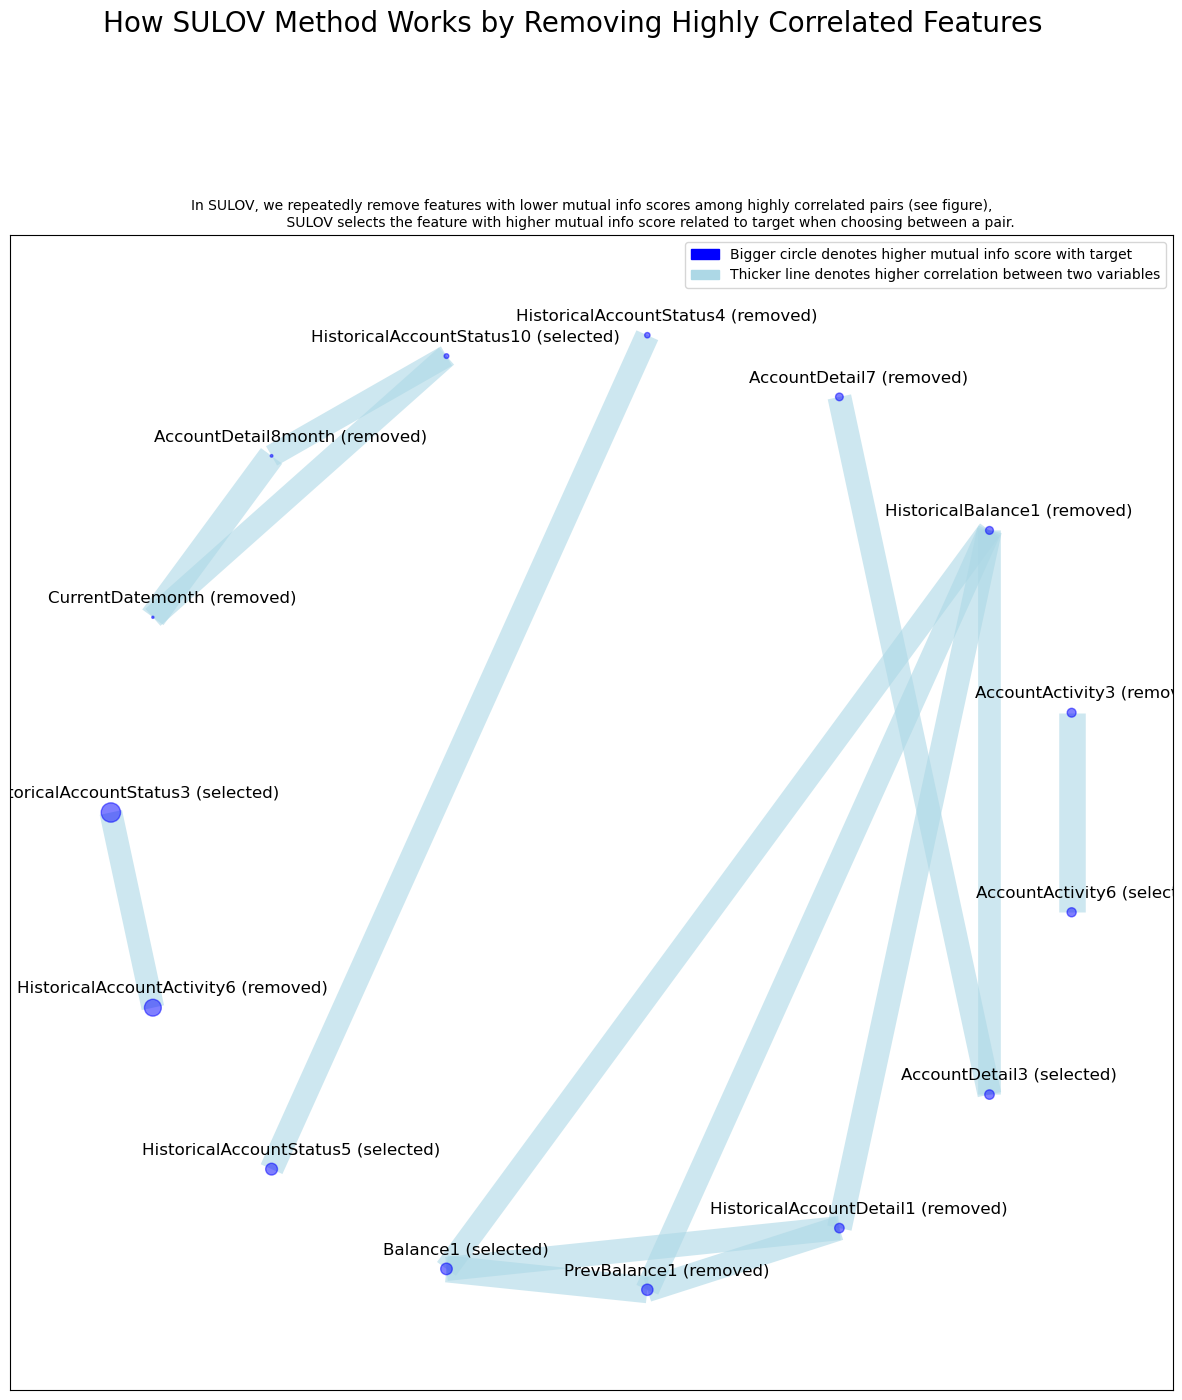

Time taken for SULOV method = 160 seconds
    Adding 0 categorical variables to reduced numeric variables  of 61
Finally 61 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 61 
    Taking top 10 features per iteration...
    XGBoost version using 1.7.4 as tree method: hist
Number of booster rounds = 20
        using 61 variables...
            selecting 25 features in this iteration
            Time taken for regular XGBoost feature selection = 4 seconds
        using 49 variables...
            selecting 21 features in this iteration
            Time taken for regular XGBoost feature selection = 4 seconds

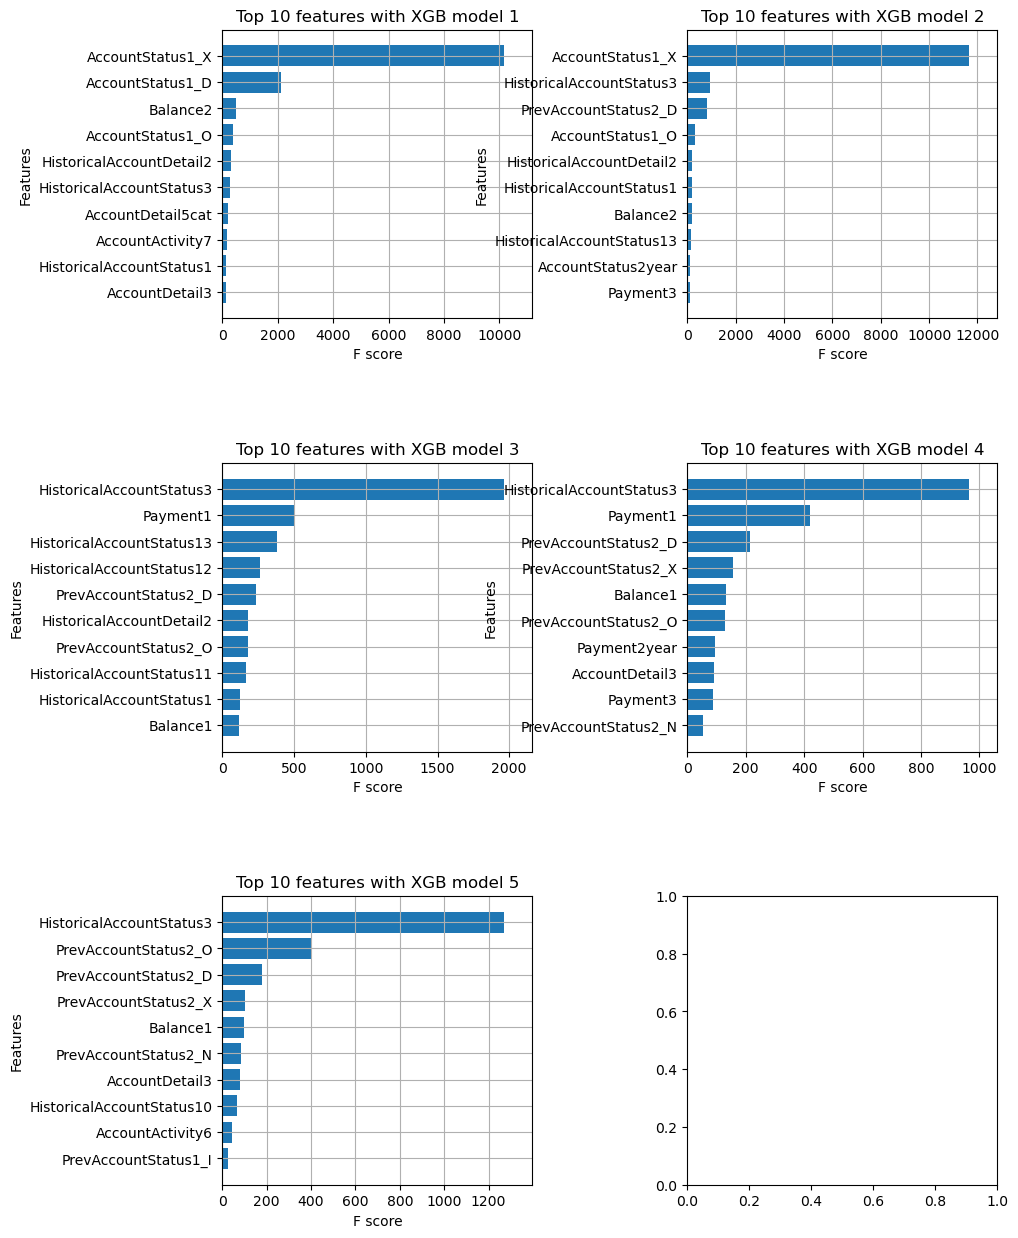

    Completed XGBoost feature selection in 4 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 30 important features:
['AccountStatus1_X', 'AccountStatus1_D', 'Balance2', 'AccountStatus1_O', 'HistoricalAccountDetail2', 'HistoricalAccountStatus3', 'AccountDetail5cat', 'AccountActivity7', 'HistoricalAccountStatus1', 'AccountDetail3', 'AccountActivity2', 'HistoricalAccountStatus13', 'PrevAccountStatus2_D', 'Balance1', 'Payment3', 'Payment1', 'AccountStatus2year', 'AccountActivity4', 'HistoricalAccountStatus12', 'HistoricalAccountStatus11', 'HistoricalAccountStatus10', 'HistoricalAccountActivity5', 'AccountDetail6cat', 'HistoricalAccountStatus6', 'HistoricalAccountStatus9', 'PrevAccountStatus2_X', 'PrevAccountStatus2_O', 'PrevAccountStatus1_I', 'Payment2year', 'P

In [11]:
from featurewiz import featurewiz
target = 'Target'
train, test = featurewiz(new_df, target,corr_limit=0.8, 
                          verbose=2, sep=",", header=0,test_data=new_final_df, 
                          feature_engg="", category_encoders="",
                          dask_xgboost_flag=False, nrows=None, skip_sulov=False)

In [12]:
train.shape

(300000, 31)

In [13]:
# X_new = train[feats]
X_new = train.drop(['Target'],axis=1)
y = train.Target
#y = df.Target

In [14]:
from sklearn.preprocessing import StandardScaler 

In [15]:
X_scaled = StandardScaler().fit_transform(X_new)
x_train, x_val, y_train, y_val = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)
from sklearn.metrics import roc_curve

In [16]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
lm_preds = logistic_model.predict(x_val)
logistic_model.score(x_train, y_train)

0.7262125

              precision    recall  f1-score   support

 Not Default       0.68      0.85      0.76     30000
     Default       0.80      0.61      0.69     30000

    accuracy                           0.73     60000
   macro avg       0.74      0.73      0.72     60000
weighted avg       0.74      0.73      0.72     60000



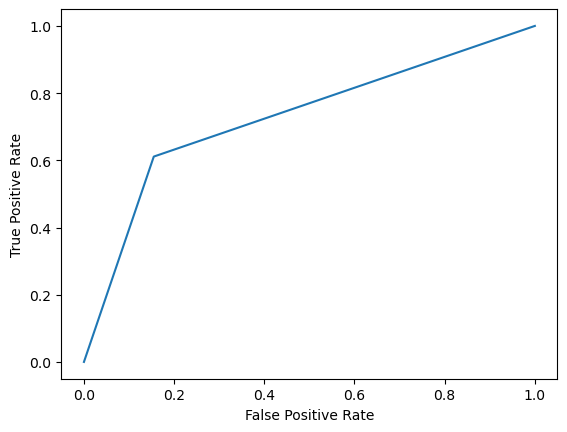

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_val, lm_preds, target_names=['Not Default', 'Default']))
fpr, tpr, _ = roc_curve(y_val,  lm_preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7497/7500 [============================>.] - ETA: 0s - loss: 0.5395 - accuracy: 0.7137

INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


7500/7500 [==============================] - 55s 7ms/step - loss: 0.5395 - accuracy: 0.7137 - val_loss: 0.5160 - val_accuracy: 0.7304
Epoch 2/5
7498/7500 [============================>.] - ETA: 0s - loss: 0.5217 - accuracy: 0.7236

INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


7500/7500 [==============================] - 49s 7ms/step - loss: 0.5217 - accuracy: 0.7236 - val_loss: 0.5142 - val_accuracy: 0.7310
Epoch 3/5
7500/7500 [==============================] - ETA: 0s - loss: 0.5205 - accuracy: 0.7246

INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


7500/7500 [==============================] - 47s 6ms/step - loss: 0.5205 - accuracy: 0.7246 - val_loss: 0.5126 - val_accuracy: 0.7305
Epoch 4/5
7498/7500 [============================>.] - ETA: 0s - loss: 0.5199 - accuracy: 0.7251

INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


7500/7500 [==============================] - 49s 7ms/step - loss: 0.5199 - accuracy: 0.7251 - val_loss: 0.5121 - val_accuracy: 0.7324
Epoch 5/5
7494/7500 [============================>.] - ETA: 0s - loss: 0.5193 - accuracy: 0.7253

INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


7500/7500 [==============================] - 51s 7ms/step - loss: 0.5194 - accuracy: 0.7253 - val_loss: 0.5118 - val_accuracy: 0.7316


In [21]:
def neural_net_predictions(model, x):
    return (model.predict(x).flatten() >= 0.5).astype(int)
shallow_nn_preds = neural_net_predictions(shallow_nn, x_val)

1875/1875 [==============================] - 8s 4ms/step


              precision    recall  f1-score   support

 Not Default       0.69      0.84      0.76     30000
     Default       0.80      0.62      0.70     30000

    accuracy                           0.73     60000
   macro avg       0.74      0.73      0.73     60000
weighted avg       0.74      0.73      0.73     60000



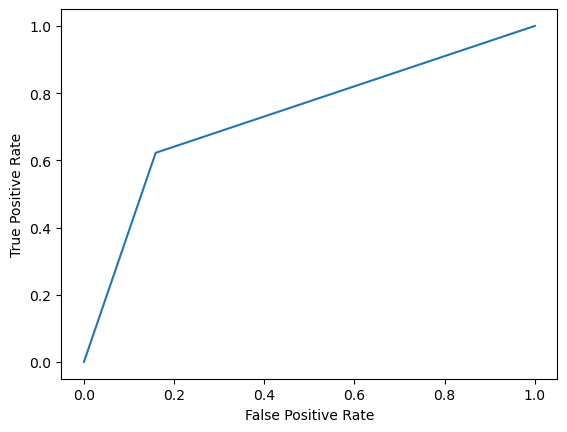

In [22]:
print(classification_report(y_val, shallow_nn_preds, target_names=['Not Default', 'Default']))
fpr, tpr, _ = roc_curve(y_val,  shallow_nn_preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

 Not Default       0.71      0.80      0.75     30000
     Default       0.77      0.67      0.72     30000

    accuracy                           0.74     60000
   macro avg       0.74      0.74      0.74     60000
weighted avg       0.74      0.74      0.74     60000



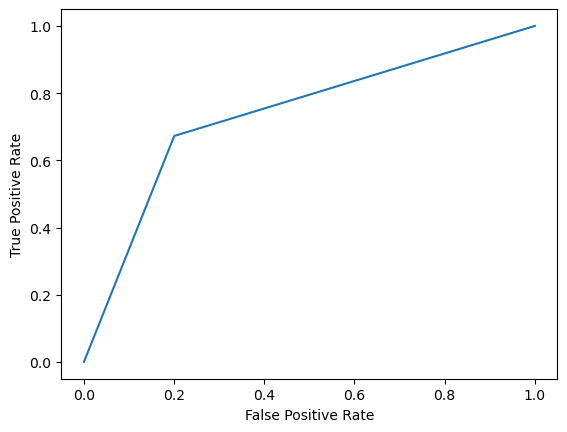

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1, max_depth=2, random_state=0)
gbc.fit(x_train, y_train)
gbc_preds = gbc.predict(x_val)
print(classification_report(y_val, gbc_preds, target_names=['Not Default', 'Default']))
fpr, tpr, _ = roc_curve(y_val,  gbc_preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

 Not Default       0.68      0.85      0.76     30000
     Default       0.80      0.60      0.69     30000

    accuracy                           0.73     60000
   macro avg       0.74      0.73      0.72     60000
weighted avg       0.74      0.73      0.72     60000



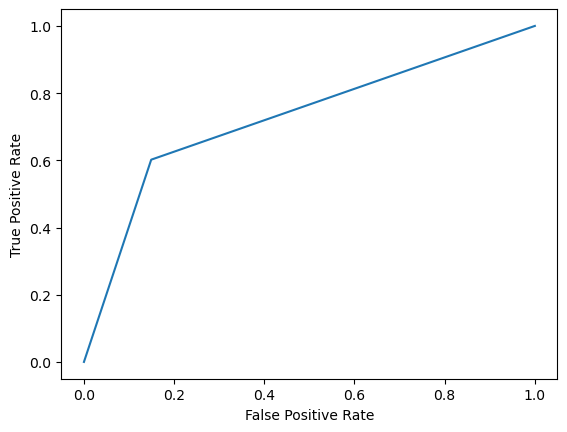

In [29]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
svc_preds = svc.predict(x_val)
print(classification_report(y_val, svc_preds, target_names=['Not Default', 'Default']))
fpr, tpr, _ = roc_curve(y_val,  svc_preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

 Not Default       0.71      0.79      0.75     30000
     Default       0.77      0.67      0.72     30000

    accuracy                           0.73     60000
   macro avg       0.74      0.73      0.73     60000
weighted avg       0.74      0.73      0.73     60000



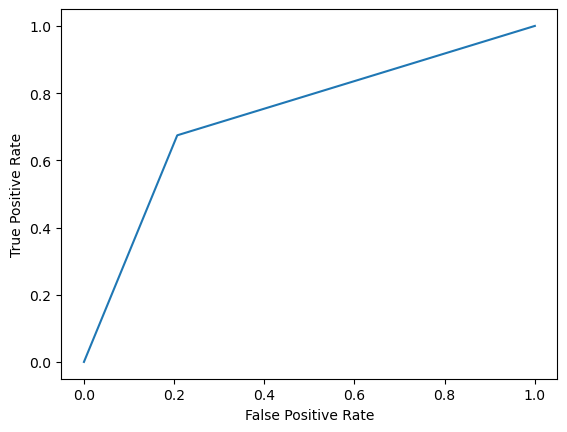

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=30, n_jobs=5)
rf.fit(x_train, y_train)
rf_preds = rf.predict(x_val)
print(classification_report(y_val, rf_preds, target_names=['Not Default', 'Default']))
fpr, tpr, _ = roc_curve(y_val,  rf_preds)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
new_final_df = transform_df(final_df)
new_df.columns, final_df.columns
final_preds = rf.predict(test)
final_preds

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [31]:
test_op = final_df[['UniqueID', 'CurrentDate']]
test_op['Prediction'] = final_preds
test_op['Prediction'].value_counts()

0    184368
1    115632
Name: Prediction, dtype: int64

In [34]:
! pip install catboost
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)

     ---------------------------------------- 74.0/74.0 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00


In [36]:
model.fit(x_train, y_train)
pred_catboost = model.predict(x_val)

0:	learn: 0.4441449	total: 50.5ms	remaining: 50.5ms
1:	learn: 0.4358670	total: 111ms	remaining: 0us


In [39]:
print(pred_catboost)

[0.29645053 0.90614423 0.90614423 ... 0.90614423 0.29645053 0.90614423]


In [43]:
print(x_train)
print(y_train)
print(y_val)

[[-0.47729698 -0.22910162 -0.5368802  ... -0.13104684  0.25140335
  -0.16395214]
 [-0.47729698 -0.22910162 -0.5368802  ... -0.13104684  0.25140335
  -0.16395214]
 [-0.47729698 -0.22910162 -0.5368802  ... -0.13104684  0.25140335
  -0.16395214]
 ...
 [-0.47729698 -0.22910162 -0.26546603 ... -0.13104684  0.25140335
  -0.16395214]
 [-0.47729698 -0.22910162 -0.5368802  ... -0.13104684  0.25140335
  -0.16395214]
 [-0.47729698  4.3648752   0.77423118 ... -0.13104684  0.25140335
  -0.16395214]]
101916    0
287553    0
103736    0
158803    1
214141    0
         ..
261466    0
100780    1
199145    0
145454    0
32701     1
Name: Target, Length: 240000, dtype: int64
89170     0
127945    1
283473    1
146291    1
231231    0
         ..
231007    1
234335    0
7354      1
186399    0
256917    1
Name: Target, Length: 60000, dtype: int64


In [44]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    # iterate over each label and check
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
    # compute the accuracy
    accuracy = correct_predictions/len(y_true)
    return accuracy

In [45]:
compute_accuracy(y_val, pred_catboost)

0.0

0.7513705127777778


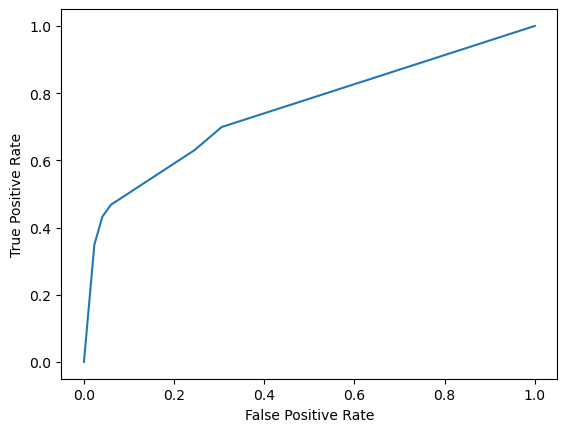

In [50]:
#calculate AUC of model
from sklearn import metrics
auc = metrics.roc_auc_score(y_val, pred_catboost)
print(auc)
fpr, tpr, _ = roc_curve(y_val,  pred_catboost)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()